In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Extract data from txt file

In [3]:
cond_1 = []
cond_2 = []

with open('/content/condition_gen_final_40.txt', 'r') as file:
    for line in file:
          # Split the line into x, y, z, and E values
          #print(line)
          try:
            a, P_gen, theta = map(str, line.strip().split())
            cond_1.append(float(P_gen[:-1]))
            cond_2.append(float(theta[:-1]))
          except:
            a, P_gen, theta, b = map(str, line.strip().split())
            cond_1.append(float(P_gen[:-1]))
            cond_2.append(float(theta[:-1]))


cond_1 -> P_gen ; cond_2 -> Theta_gen

In [4]:
# Get array of points where Theta_gen is changing values, so that it can be used for color mapping the next plot.

prev_ele = 0
count = 0
c_l = []
val = []
for i,ele in enumerate(cond_2):
  if ele != prev_ele:
    c_l.append(i)
    val.append(ele)
  prev_ele = ele

print(c_l)
print(len(c_l))

[0, 41, 98, 156, 198, 254, 300, 351, 391, 457, 498, 558, 625, 667, 712, 756, 796, 846, 898, 949, 987, 1026, 1080, 1145, 1204, 1245, 1246]
27


In [8]:
# Lists to store the x, y, z, and E values
x_values = []
y_values = []
z_values = []
E_values = []

count = -1
p = 0
# Read data from the file
with open('/content/cells_final_40.txt', 'r') as file:
    for line in file:
        count+=1
        try:
          if(count>=c_l[p]) and (count<c_l[p+1]):
            # Split the line into x, y, z, and E values
            E, x, y, z = map(str, line.strip().split())

            input_string = E
            cleaned_string = input_string[1:] #input_string.replace('[', '').strip()
            E = float(cleaned_string)

            x = float(x)
            y = float(y)

            input_string = z
            cleaned_string = input_string[:-1]
            z = float(cleaned_string)

            x_values.append(x)
            y_values.append(y)
            z_values.append(z)
            E_values.append(val[p]) # E_values given val[p] -> i.e theta values.
          else:
            p+=1
            count-=1
        except:
            # Split the line into x, y, z, and E values
            E, x, y, z = map(str, line.strip().split())

            input_string = E
            cleaned_string = input_string[1:] #input_string.replace('[', '').strip()
            E = float(cleaned_string)

            x = float(x)
            y = float(y)

            input_string = z
            cleaned_string = input_string[:-1]
            z = float(cleaned_string)

            x_values.append(x)
            y_values.append(y)
            z_values.append(z)
            E_values.append(val[p-1])

2D plot for generated particles maped by the theta_values

<Figure size 640x480 with 0 Axes>

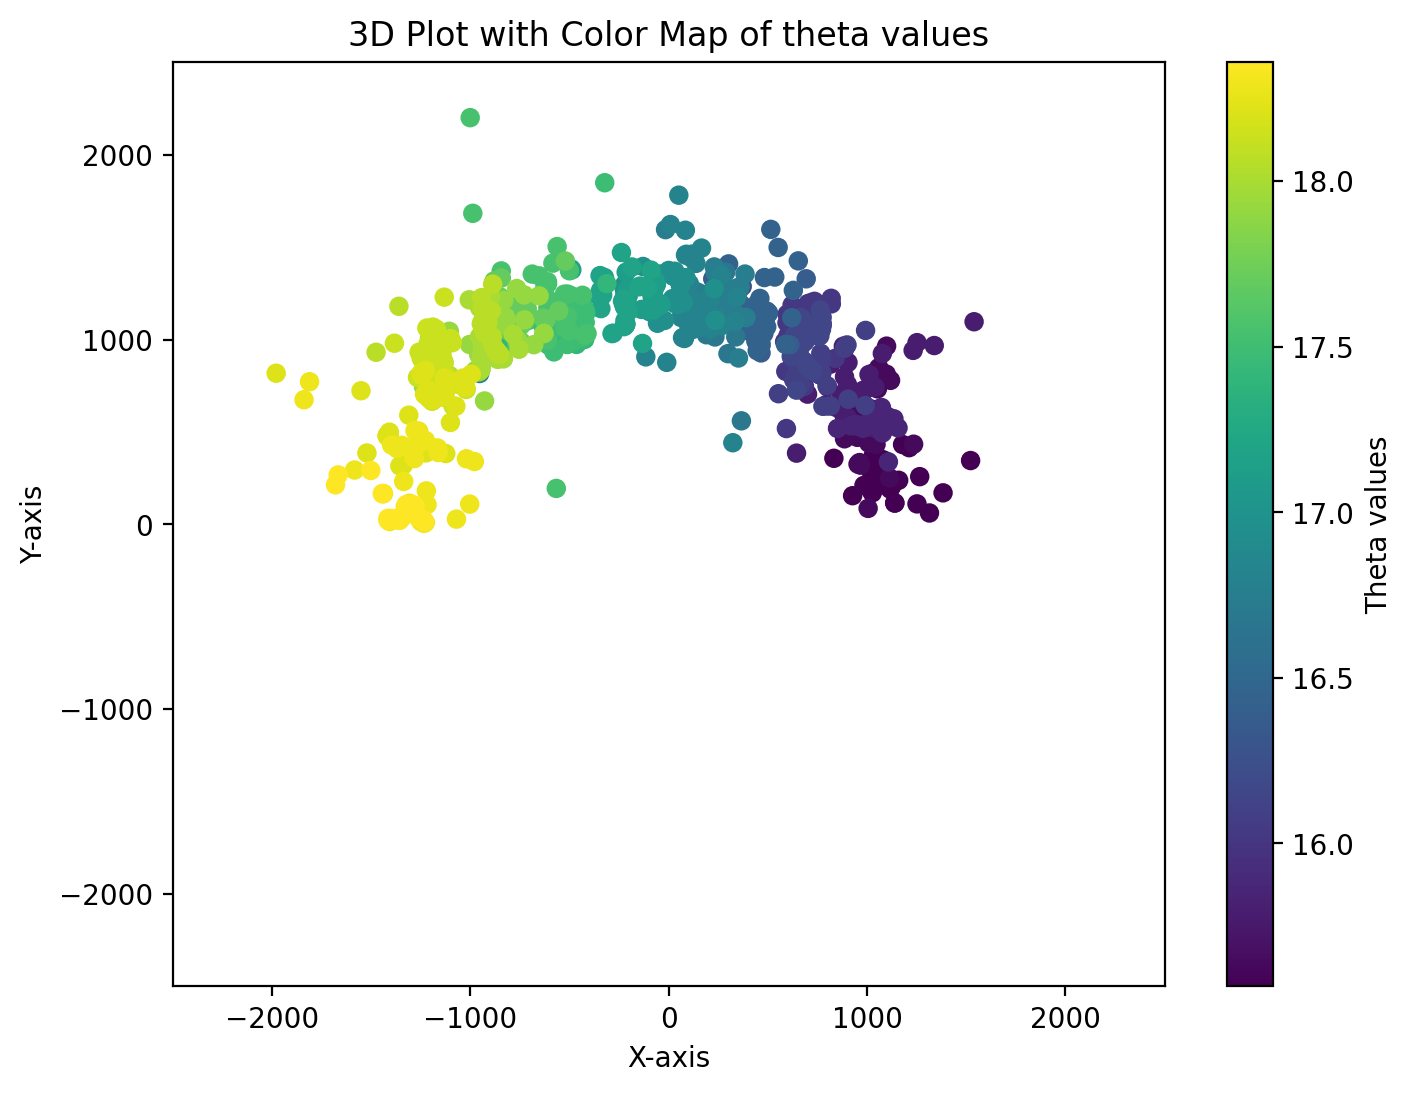

In [9]:
# Create the 3D plot
fig = plt.figure()
fig = plt.figure(figsize=(8, 6), dpi=200)

ax2 = fig.add_subplot()
colormap = plt.get_cmap('viridis')
sc = ax2.scatter(x_values, y_values,  c=E_values, cmap=colormap)

# Add a color bar to show the E values corresponding to colors
cbar = plt.colorbar(sc)
cbar.set_label('Theta values')

# Label the axes and title the plot
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
#ax.set_zlabel('Z-axis')
ax2.set_title('3D Plot with Color Map of theta values')

ax2.set_xlim(-2500, 2500)
ax2.set_ylim(-2500, 2500)

# Display the plot

plt.show()

In [10]:
# Lists to store the x, y, z, and E values
x_values = []
y_values = []
z_values = []
E_values = []

count = -1
p = 0
# Read data from the file
with open('/content/cells_final_40.txt', 'r') as file:
    for line in file:
        count+=1
        try:
          if(count>=c_l[p]) and (count<c_l[p+1]):
            # Split the line into x, y, z, and E values
            E, x, y, z = map(str, line.strip().split())

            input_string = E
            cleaned_string = input_string[1:] #input_string.replace('[', '').strip()
            E = float(cleaned_string)

            x = float(x)
            y = float(y)

            input_string = z
            cleaned_string = input_string[:-1]
            z = float(cleaned_string)

            x_values.append(x)
            y_values.append(z)
            z_values.append(y)
            E_values.append(val[p])
          else:
            p+=1
            count-=1
        except:
            # Split the line into x, y, z, and E values
            E, x, y, z = map(str, line.strip().split())

            input_string = E
            cleaned_string = input_string[1:] #input_string.replace('[', '').strip()
            E = float(cleaned_string)

            x = float(x)
            y = float(y)

            input_string = z
            cleaned_string = input_string[:-1]
            z = float(cleaned_string)

            x_values.append(x)
            y_values.append(z)
            z_values.append(y)
            E_values.append(val[p-1])

3D plot

<Figure size 640x480 with 0 Axes>

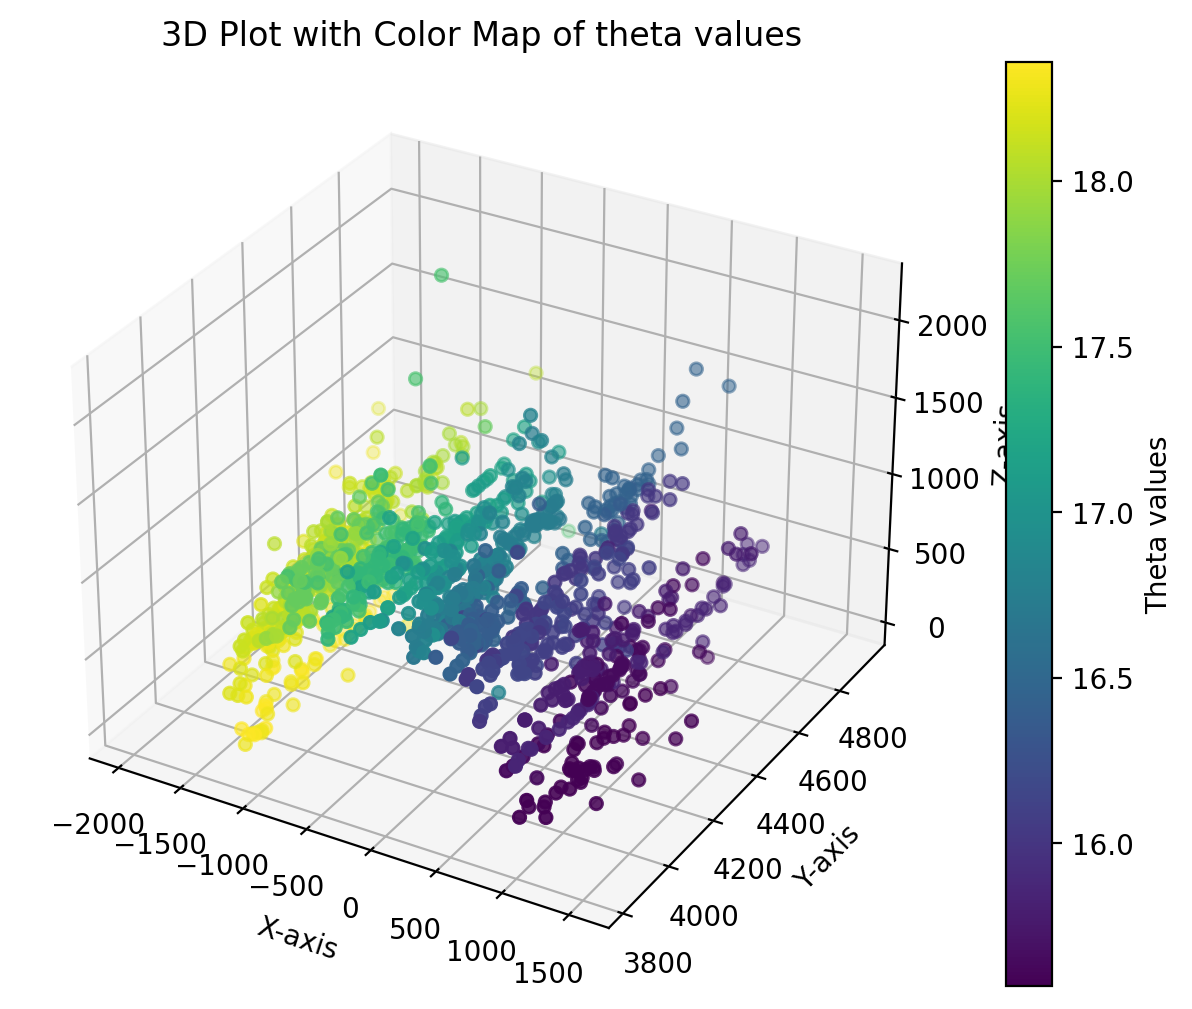

In [11]:
# Create the 3D plot
fig = plt.figure()
fig = plt.figure(figsize=(8, 6), dpi=200)
ax = fig.add_subplot(111, projection='3d')

# Use a colormap for coloring the points based on E values
# You can choose any colormap from: https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = plt.get_cmap('viridis')

# Scatter plot with color based on E values
sc = ax.scatter(x_values, y_values, z_values, c=E_values, cmap=colormap)

# Add a color bar to show the E values corresponding to colors
cbar = plt.colorbar(sc)
cbar.set_label('Theta values')



# Label the axes and title the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Plot with Color Map of theta values')


ax2.set_xlim(-2500, 2500)
ax2.set_ylim(-2500, 2500)

# Display the plot

plt.show()